In [1]:
%matplotlib inline
import os
import sys
import inspect
import matplotlib.pyplot as plt
import PIL
import dlib, cv2
import numpy as np
from skimage.color import rgb2hsv
from skimage.util import img_as_float, img_as_ubyte
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from autocrop import Cropper



# This below mehtod will draw all those points which are from 0 to 67 on face one by one.
def drawPoints(image, faceLandmarks, startpoint, endpoint):
  points = []
  for i in range(startpoint, endpoint+1):
    point = [faceLandmarks.part(i).x, faceLandmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.fillPoly(image, [points], (0,255,0))

# Use this function for 70-points facial landmark detector model
# we are checking if points are exactly equal to 68, then we draw all those points on face one by one
def facePoints(image, faceLandmarks):
    assert(faceLandmarks.num_parts == 68)
    drawPoints(image, faceLandmarks, 17, 21)          # Left eyebrow
    drawPoints(image, faceLandmarks, 22, 26)          # Right eyebrow
    drawPoints(image, faceLandmarks, 27, 35)          # Whole nose
    drawPoints(image, faceLandmarks, 36, 41)          # Left eye
    drawPoints(image, faceLandmarks, 42, 47)          # Right Eye
    drawPoints(image, faceLandmarks, 48, 59)          # Outer lip
    drawPoints(image, faceLandmarks, 60, 67)          # Inner lip

# Use this function for any model other than
# 70 points facial_landmark detector model
def facePoints2(image, faceLandmarks, color=(0, 255, 0), radius=4):
  for p in faceLandmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)


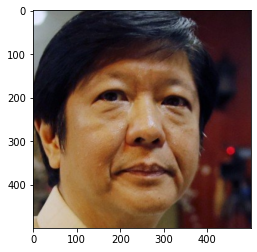

In [25]:
Model_PATH = "shape_predictor_68_face_landmarks.dat"
frontalFaceDetector = dlib.get_frontal_face_detector()
faceLandmarkDetector = dlib.shape_predictor(Model_PATH)

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

#PICTURE PATH
loc = '9500be80-704b-11eb-ba58-f8f0a43119e3_image_hires_194736.jpg'
c = Cropper(face_percent=80)
img = img_as_float(c.crop(loc))
jimg = img_as_float(c.crop(loc))
jawcrop = c.crop(loc)
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


List of all faces detected:  1
Total number of face landmarks detected  68


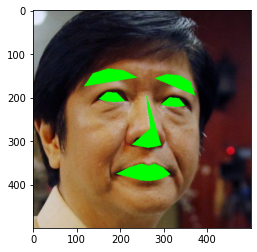

In [26]:
allFaces = frontalFaceDetector(c.crop(loc), 0)
print("List of all faces detected: ",len(allFaces))

allFacesLandmark = []

for k in range(0, len(allFaces)):
    faceRectangleDlib = dlib.rectangle(int(allFaces[k].left()),int(allFaces[k].top()),
        int(allFaces[k].right()),int(allFaces[k].bottom()))
    detectedLandmarks = faceLandmarkDetector(c.crop(loc), faceRectangleDlib)
    
    if k==0:
        print("Total number of face landmarks detected ",len(detectedLandmarks.parts()))
    

    facePoints(img, detectedLandmarks)
    
plt.imshow(img);

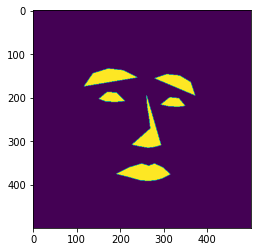

In [27]:
from skimage.color import rgb2hsv
img_hsv = rgb2hsv(img)

lower_green = img_hsv[:,:,0] > 0.33
upper_green = img_hsv[:,:,0] < 0.335
saturation = img_hsv[:,:,1] > 0.99
value = img_hsv[:,:,2] > 0.99
green = upper_green*lower_green*saturation*value

plt.imshow(green);

<Figure size 432x288 with 0 Axes>

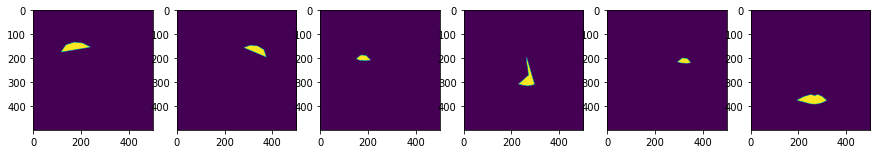

In [28]:
label_im = label(green)
plt.figure()

fig, axes = plt.subplots(1,6,figsize=(15,15)) 

axes[0].imshow(label_im==1)
axes[1].imshow(label_im==2)
axes[2].imshow(label_im==3)
axes[3].imshow(label_im==4)
axes[4].imshow(label_im==5)
axes[5].imshow(label_im==6)

In [29]:
props=regionprops(label_im)
#CHANGE LABEL
print('Left Brow',props[2-1].solidity)
print('Right Brow',props[1-1].solidity)
print('Left Eye',props[5-1].eccentricity)
print('Right Eye',props[3-1].eccentricity)
print('Nose',props[4-1].solidity)
print('Mouth',props[6-1].eccentricity)

Left Brow 0.9585769980506823
Right Brow 0.9571271528032246
Left Eye 0.8972935781260751
Right Eye 0.8985410877761656
Nose 0.5696868276356681
Mouth 0.941515113500151


List of all faces detected:  1


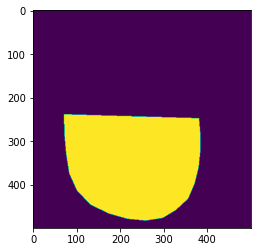

In [30]:
def jawPoints(image, faceLandmarks):
    assert(faceLandmarks.num_parts == 68)
    points = []
    for i in range(0, 16+1):
        point = [faceLandmarks.part(i).x, faceLandmarks.part(i).y]
        points.append(point)
    points = np.array(points, dtype=np.int32)
    cv2.fillPoly(image, [points], (0,255,0))

allFaces = frontalFaceDetector(jawcrop, 0)
print("List of all faces detected: ",len(allFaces))

allFacesLandmark = []

for k in range(0, len(allFaces)):
    faceRectangleDlib = dlib.rectangle(int(allFaces[k].left()),int(allFaces[k].top()),
        int(allFaces[k].right()),int(allFaces[k].bottom()))
    detectedLandmarks = faceLandmarkDetector(jawcrop, faceRectangleDlib)

    jawPoints(jimg, detectedLandmarks)


jimg_hsv = rgb2hsv(jimg)
jlower_green = jimg_hsv[:,:,0] > 0.33
jupper_green = jimg_hsv[:,:,0] < 0.335
jsaturation = jimg_hsv[:,:,1] > 0.99
jvalue = jimg_hsv[:,:,2] > 0.99
jgreen = jupper_green*jlower_green*jsaturation*jvalue
jlabel_im = label(jgreen)
plt.imshow(jlabel_im)


In [31]:
jprops=regionprops(jlabel_im)
print('Jaw',jprops[0].solidity)

Jaw 0.9939959041826982
